# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [2]:
can_df = pd.read_csv('breast-cancer-wisconsin.data.txt', names = ["ID", "cl_th", "cell_sz", "cell_sh","mar_ad","sin_sz","ba_nu","nor_nu","bl_ch","mit","class"])

In [3]:
can_df.head(10)
#Used acronym to define the names of the column

,ID,cl_th,cell_sz,cell_sh,mar_ad,sin_sz,ba_nu,nor_nu,bl_ch,mit,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [4]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [5]:
can_df = can_df.drop(['ID'],axis=1)

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [6]:
can_df.shape

(699, 10)

In [7]:
can_df.corr()

,cl_th,cell_sz,cell_sh,mar_ad,sin_sz,nor_nu,bl_ch,mit,class
cl_th,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
cell_sz,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
cell_sh,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
mar_ad,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
sin_sz,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
nor_nu,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
bl_ch,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
mit,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


In [8]:
can_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cl_th,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
cell_sz,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
cell_sh,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
mar_ad,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
sin_sz,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
nor_nu,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
bl_ch,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mit,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


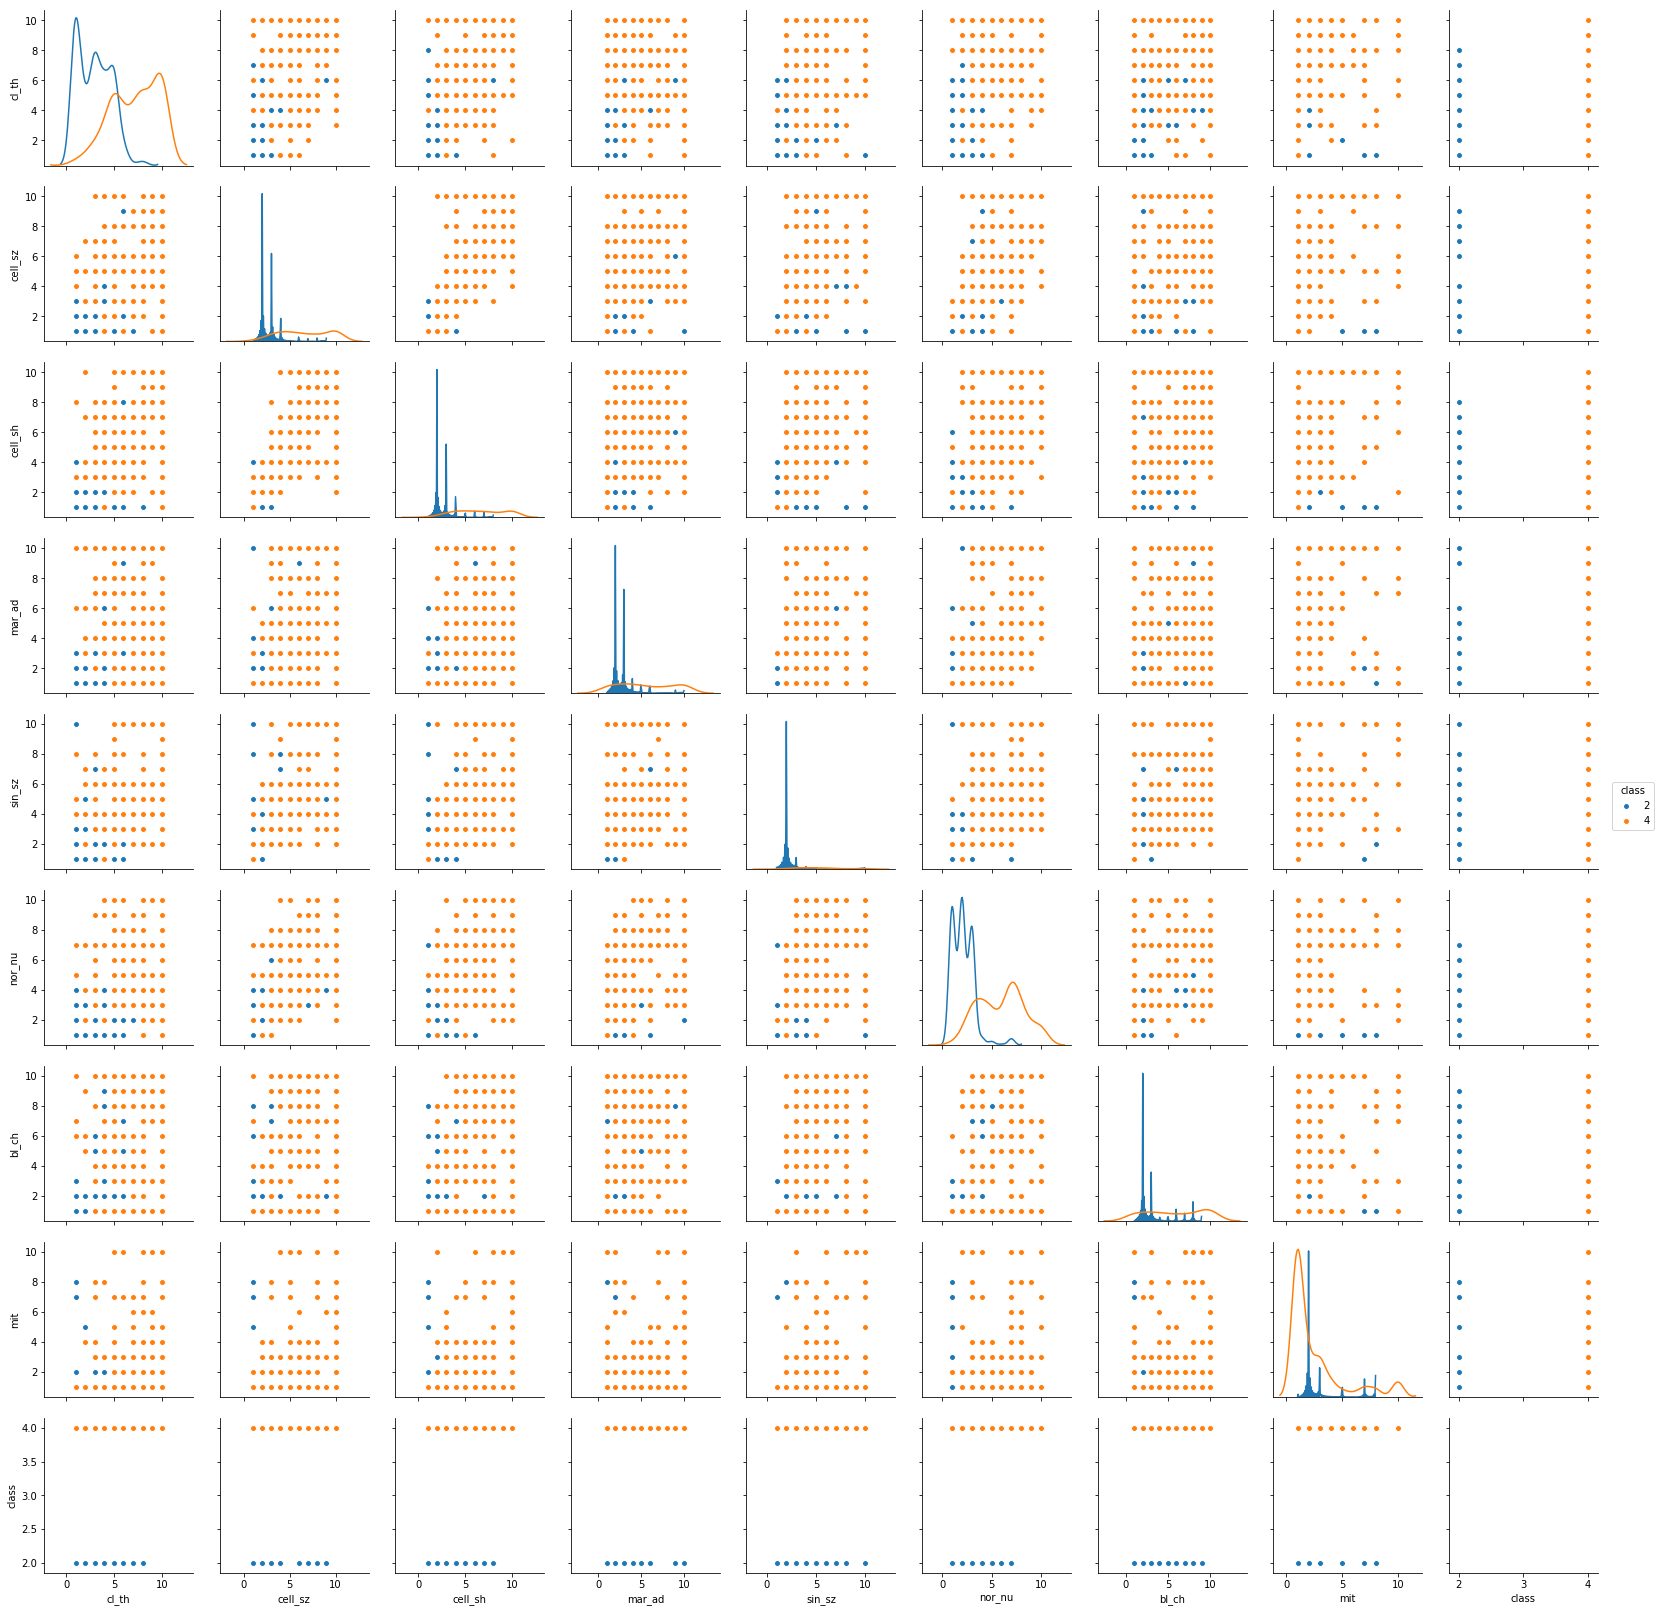

In [9]:
sns.pairplot(can_df, hue='class',diag_kind='kde')

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [10]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [11]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [12]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [13]:
can_df.info()
# We have ba_nu as object. So it must be having some incorrect values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
cl_th      699 non-null int64
cell_sz    699 non-null int64
cell_sh    699 non-null int64
mar_ad     699 non-null int64
sin_sz     699 non-null int64
ba_nu      699 non-null object
nor_nu     699 non-null int64
bl_ch      699 non-null int64
mit        699 non-null int64
class      699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [14]:
can_df['ba_nu'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: ba_nu, dtype: int64

In [15]:
# Dropping the rows with value ?
can_df = can_df.drop(can_df[can_df['ba_nu']== '?'].index)

In [31]:
can_df['ba_nu'] = can_df['ba_nu'].astype('int64')
# As even after dropping the ? the data type is not changed, hence changed to INT

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [18]:
# Check for correlation of variable

In [19]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [20]:
#Let us check for pair plots

In [21]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


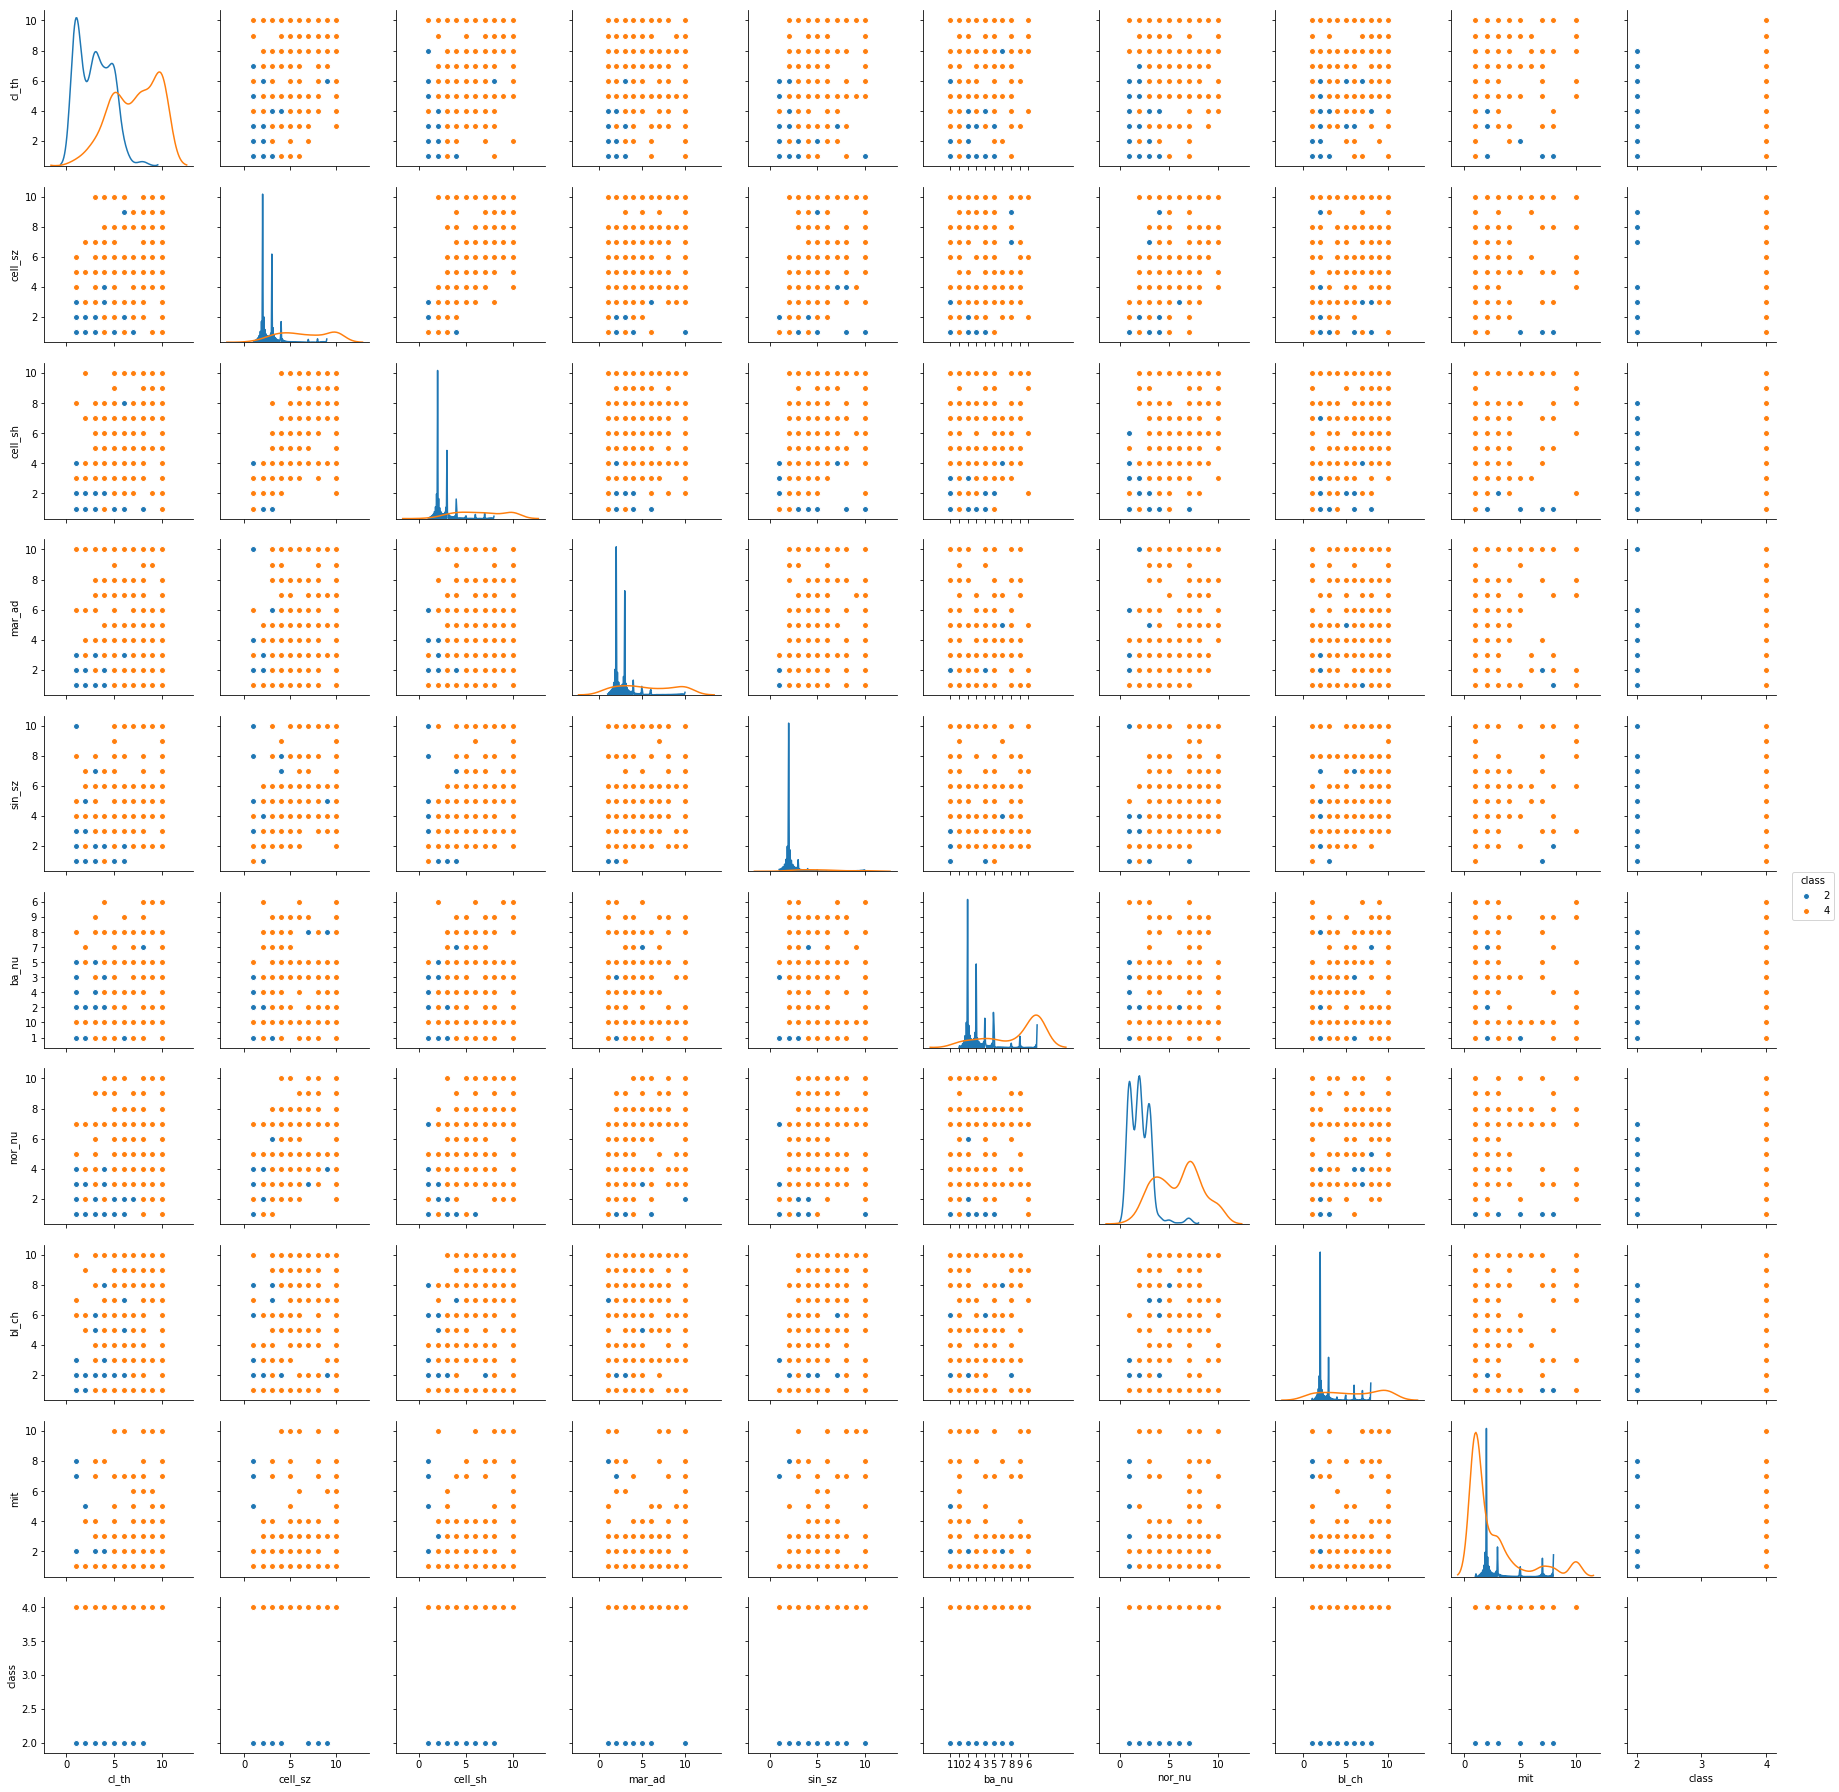

In [22]:
sns.pairplot(can_df, hue='class',diag_kind='kde')

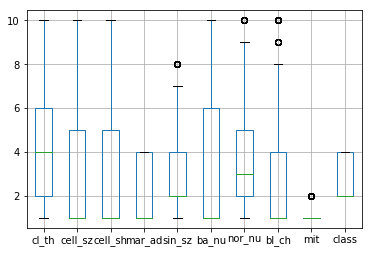

In [59]:
can_df.boxplot()

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [24]:
# We could see most of the outliers are now removed.

In [51]:
# Box-plot showing outliers in col. Mitoses. We need to treat those
can_df['mit'].value_counts()

1    563
2    120
Name: mit, dtype: int64

In [50]:
can_df['mit'] = np.where(can_df['mit']>=2,2,can_df['mit'])

In [55]:
can_df['mar_ad'].value_counts()

1    393
4    174
3     58
2     58
Name: mar_ad, dtype: int64

In [54]:
can_df['mar_ad'] = np.where(can_df['mar_ad']>=4,4,can_df['mar_ad'])

In [57]:
can_df['sin_sz'].value_counts()

2     376
3      71
4      48
1      44
6      40
5      39
10     31
8      21
7      11
9       2
Name: sin_sz, dtype: int64

In [58]:
can_df['sin_sz'] = np.where(can_df['sin_sz']>=8,8,can_df['sin_sz'])
# All outlier treatment completed

# Q6 Create a covariance matrix for identifying Principal components

In [62]:
# PCA
# Step 1 - Create covariance matrix
X = can_df.drop(['class'],axis=1)
y = can_df['class']
# Scale the X dataframe
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [63]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00146628 0.64342355 0.65442815 0.55411674 0.54003109 0.59396107
  0.55455439 0.534849   0.44416719]
 [0.64342355 1.00146628 0.90855848 0.71675191 0.77637873 0.69272299
  0.75666702 0.7204008  0.4967633 ]
 [0.65442815 0.90855848 1.00146628 0.70107331 0.74716779 0.71492429
  0.73642172 0.71901615 0.46855216]
 [0.55411674 0.71675191 0.70107331 1.00146628 0.61557598 0.69518163
  0.68287362 0.61902279 0.418418  ]
 [0.54003109 0.77637873 0.74716779 0.61557598 1.00146628 0.61575504
  0.64342462 0.66365233 0.47359205]
 [0.59396107 0.69272299 0.71492429 0.69518163 0.61575504 1.00146628
  0.68161283 0.58513691 0.46309129]
 [0.55455439 0.75666702 0.73642172 0.68287362 0.64342462 0.68161283
  1.00146628 0.66657749 0.39441975]
 [0.534849   0.7204008  0.71901615 0.61902279 0.66365233 0.58513691
  0.66657749 1.00146628 0.49845736]
 [0.44416719 0.4967633  0.46855216 0.418418   0.47359205 0.46309129
  0.39441975 0.49845736 1.00146628]]


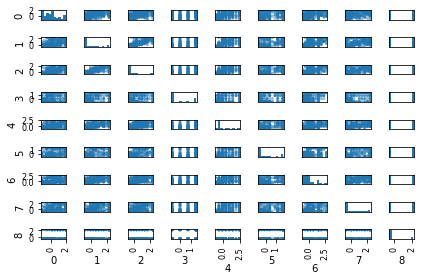

In [76]:
X_std_df = pd.DataFrame(X_std)
axes = pd.plotting.scatter_matrix(X_std_df)
plt.tight_layout()

In [64]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [65]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.30378448 -0.10399445  0.01407516 -0.76663244  0.48192746 -0.16904125
   0.20408364 -0.08055222  0.00298742]
 [-0.37525348  0.10585601  0.73051606  0.12310109  0.19603171  0.16950099
  -0.40608308  0.0132733  -0.25871425]
 [-0.3721048   0.13488348 -0.66582095  0.05803994  0.20550048  0.14695772
  -0.56120406  0.05516454 -0.12181195]
 [-0.33416986  0.19401616 -0.04569401 -0.0992805  -0.50441652 -0.06670391
   0.08304039 -0.72842891 -0.20580054]
 [-0.33836483  0.01707801 -0.07202993  0.35464318  0.29563078  0.55882667
   0.55441592 -0.12660579  0.17654076]
 [-0.33550874  0.08305077  0.08809037 -0.29786736 -0.48677191  0.24380998
  -0.10323979  0.34505894  0.59827857]
 [-0.34169134  0.26541305 -0.06834431  0.08502769 -0.19188626 -0.28972691
   0.39023787  0.55612511 -0.46752491]
 [-0.33343878 -0.05860958  0.03853897  0.39699804  0.16167557 -0.67787718
  -0.03021858 -0.10745244  0.47767682]
 [-0.24854993 -0.91710173 -0.04047558  0.06754013 -0.21294893  0.03819383
  -0

In [66]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [67]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 67.00312799  74.81407547  80.62462836  85.68360563  89.66667021
  93.09477032  96.21902184  99.02802637 100.        ]


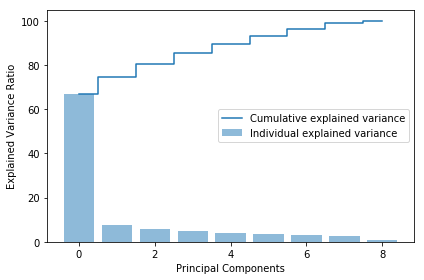

In [71]:
plt.figure(figsize=(6 , 4))
plt.bar(range(9), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(9), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [72]:
# From the above graph its evident that 6-7 Eigen vectors or PCA component will be enough to
# predict the class

# Q7 Identify eigen values and eigen vector

In [26]:
# Step 2- Get eigen values and eigen vector

In [ ]:
#Completed in previous steps

# Q8 Find variance and cumulative variance by each eigen vector

In [ ]:
# Completed Steps

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [73]:
from sklearn.decomposition import PCA

In [78]:
pca = PCA(n_components=6)
pca.fit(X_std_df)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [79]:
X_pca = pca.transform(X_std_df)

In [88]:
X_pca_df = pd.DataFrame(X_pca)

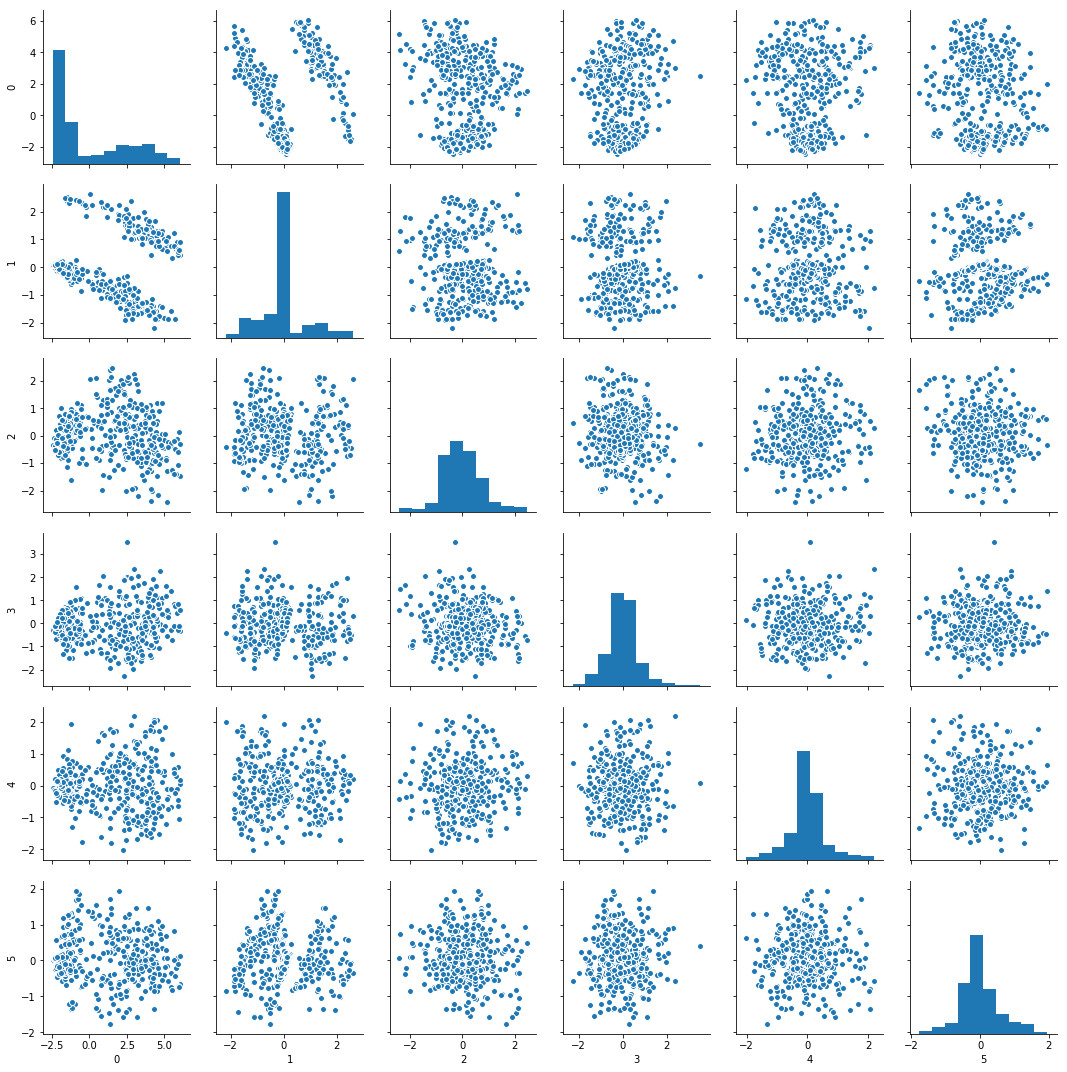

In [89]:
sns.pairplot(X_pca_df)

# Q10 Find correlation between components and features

In [82]:
rel_df = pd.DataFrame(pca.components_,columns=list(X))
rel_df

,cl_th,cell_sz,cell_sh,mar_ad,sin_sz,ba_nu,nor_nu,bl_ch,mit
0,0.303784,0.375253,0.372105,0.334170,0.338365,0.335509,0.341691,0.333439,0.248550
1,0.103994,-0.105856,-0.134883,-0.194016,-0.017078,-0.083051,-0.265413,0.058610,0.917102
2,0.766632,-0.123101,-0.058040,0.099281,-0.354643,0.297867,-0.085028,-0.396998,-0.067540
3,0.481927,0.196032,0.205500,-0.504417,0.295631,-0.486772,-0.191886,0.161676,-0.212949
4,-0.169041,0.169501,0.146958,-0.066704,0.558827,0.243810,-0.289727,-0.677877,0.038194
5,0.080552,-0.013273,-0.055165,0.728429,0.126606,-0.345059,-0.556125,0.107452,-0.061380


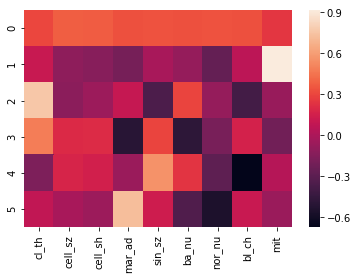

In [90]:
sns.heatmap(rel_df)

# Content Based Recommendation System

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [105]:
jokes_df = pd.read_csv('jokes.csv',nrows=200)

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [113]:
#Extarcted only 200 rows only
jokes_df = jokes_df.drop(['NumJokes'],axis=1)

In [114]:
jokes_df.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q22 Change the column indices from 0 to 99

In [115]:
jokes_df.columns = range(100)

In [116]:
jokes_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [117]:
jokes_df = jokes_df.replace(99,0)

In [118]:
jokes_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [119]:
ratings_diff = StandardScaler().fit_transform(jokes_df)

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [122]:
ratings_diff = pd.DataFrame(ratings_diff)

In [139]:
ratings_diff

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,-1.132409,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,1.667223,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461
2,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
3,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,0.189306,...,-0.192459,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
4,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,0.968316,...,1.582983,1.707868,0.975838,1.313343,1.557140,0.380786,0.727864,1.850639,0.511142,0.330133
5,-1.490063,-0.843136,0.045369,-2.023513,-1.301062,-1.286999,-1.578608,-0.161811,-1.655217,-0.539640,...,-1.403455,-2.232467,-0.575275,-1.038043,-0.835272,-1.266839,-0.217896,-2.629557,-1.591755,-1.219861
6,-0.117881,-0.121130,-0.053284,0.181880,1.591786,-2.548886,1.344707,1.830154,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,-0.184043,-0.175922,0.643062,-0.233349,-0.026858,-0.041444,-0.160954
7,1.403307,0.523373,2.002748,-1.429354,-1.498469,-0.689143,1.620828,0.308342,-1.292726,-1.064321,...,2.280845,-0.409232,-0.393528,-1.822800,-1.131677,-1.266839,0.428065,-0.041190,0.360716,-0.160954
8,-0.960761,-0.843136,-2.165370,-1.605786,-1.605475,-0.367396,-0.972924,-1.823844,-1.955637,-0.499588,...,1.302470,-0.146965,0.944503,-0.267712,-0.263634,-0.237914,-0.322980,-0.109984,-1.085217,-1.680255
9,0.551531,0.929247,1.101412,0.962849,1.189591,0.873954,1.560259,0.537233,0.743180,1.454948,...,-0.192459,1.357125,-0.362193,-0.184043,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954


In [141]:
rat_mean = ratings_diff.mean(axis=1)

In [142]:
rat_mean.argsort()[:-10:-1]

199     94
198     44
197     86
196    159
195    109
194     13
193     17
192     73
191     46
dtype: int64